# **Mounting the drive to upload the data**

---



In [0]:
import pandas as pd
import numpy as np

In [0]:
# the below two lines if you're using Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Base model**

---



In [0]:
import sympy as sym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Model 1: One variable**

**Defining symbols**

In [0]:
params = sym.symbols('a d')
a, d = sym.symbols('a d')

In [0]:
#reading the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/Optimization COVID-19 dataset_Italy.csv')
size_data = len(data)
print(f'number of days: {size_data}')

number of days: 89


**Plotting the data**

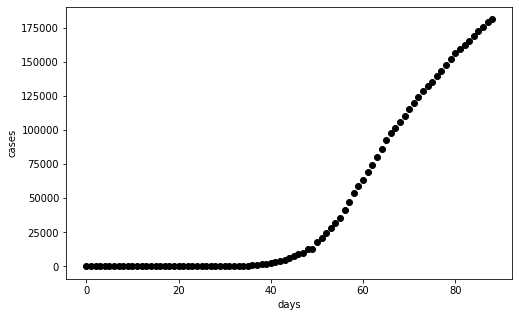

In [0]:
plt.figure(figsize=(8, 5))
x_data, y_data = (list(range(0, size_data)), data["Daily_cases"].values)
plt.plot(x_data, y_data, 'ro', c='black')
plt.ylabel("cases")
plt.xlabel("days")
plt.show()

In [0]:
y = data["Daily_cases"][0]
sum_squared_fn = (y - (a * (d ** 1))) ** 2

for i in range(1, size_data - 5):
    y = data["Daily_cases"][i]
    sum_squared_fn = sum_squared_fn + (y - (a * (d ** (i + 1)))) ** 2
print(sum_squared_fn)

a**2*d**16 + a**2*d**14 + a**2*d**12 + a**2*d**10 + a**2*d**8 + a**2*d**6 + a**2*d**4 + a**2*d**2 + (-a*d**9 + 2)**2 + (-a*d**10 + 2)**2 + (-a*d**11 + 2)**2 + (-a*d**12 + 2)**2 + (-a*d**13 + 2)**2 + (-a*d**14 + 2)**2 + (-a*d**15 + 2)**2 + (-a*d**16 + 3)**2 + (-a*d**17 + 3)**2 + (-a*d**18 + 3)**2 + (-a*d**19 + 3)**2 + (-a*d**20 + 3)**2 + (-a*d**21 + 3)**2 + (-a*d**22 + 3)**2 + (-a*d**23 + 3)**2 + (-a*d**24 + 3)**2 + (-a*d**25 + 3)**2 + (-a*d**26 + 3)**2 + (-a*d**27 + 3)**2 + (-a*d**28 + 3)**2 + (-a*d**29 + 3)**2 + (-a*d**30 + 20)**2 + (-a*d**31 + 62)**2 + (-a*d**32 + 155)**2 + (-a*d**33 + 229)**2 + (-a*d**34 + 322)**2 + (-a*d**35 + 453)**2 + (-a*d**36 + 655)**2 + (-a*d**37 + 888)**2 + (-a*d**38 + 1128)**2 + (-a*d**39 + 1694)**2 + (-a*d**40 + 2036)**2 + (-a*d**41 + 2502)**2 + (-a*d**42 + 3089)**2 + (-a*d**43 + 3858)**2 + (-a*d**44 + 4636)**2 + (-a*d**45 + 5883)**2 + (-a*d**46 + 7375)**2 + (-a*d**47 + 9172)**2 + (-a*d**48 + 10149)**2 + (-a*d**49 + 12462)**2 + (-a*d**50 + 12462)**2 + (-a*d

In [0]:
f = sym.sympify(sum_squared_fn)
j = sym.sympify(sym.hessian(f, (a, d)))
gradient = sym.zeros(2, 1)

for i, param in enumerate(params):
    gradient[i] = sym.diff(f, param)

**Functions used in the base model**

In [0]:
def gradient_fn(x):
    gradient_value = gradient.evalf(subs={a: x[0], d: x[1]})
    return np.array([gradient_value[0], gradient_value[1]]).astype(np.float64)


def hessian_fn(x):
    j_value = j.evalf(subs={a: x[0], d: x[1]})
    return np.array(j_value).astype(np.float64)


# %% [code]
def newton_method(g, h, x, eps):
    gradient_value = g(x)
    error = np.linalg.norm(x, ord=2)  # l2 norm of vector
    iteration_counter = 0

    while abs(error) > eps and iteration_counter < 100:
        j_inv = np.linalg.inv(h(x))
        delta = j_inv.dot(gradient_value)
        x = x - delta
        gradient_value = g(x)
        error = np.linalg.norm(x, ord=2)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(error) > eps:
        iteration_counter = -1
    return x, iteration_counter
  
def expo(point):
    expo_fn = f'{results[0]}*({results[1]}**{point})'
    return sym.sympify(expo_fn).evalf()

In [0]:
results, n = newton_method(gradient_fn, hessian_fn, x=np.array([14.01, 2]), eps=0.01)
print(results)
print(n)

[2.0921806  1.13713773]
-1


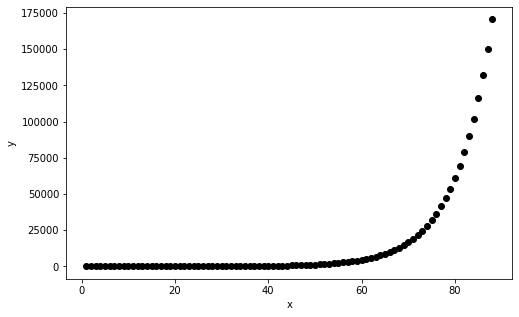

In [0]:
ys = []

for i in range(1, size_data):
    ys.append(expo(i))

plt.figure(figsize=(8, 5))
x_data, y_data = (list(range(1, size_data)), ys)
plt.plot(x_data, y_data, "ro", c='black')
plt.ylabel("y")
plt.xlabel("x")
plt.show()

## **Model 2: Two variables**

**Defining symbols**

In [0]:
params = sym.symbols('a b c')
a, b, c = sym.symbols('a b c')

In [0]:
#reading the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/Optimization COVID-19 dataset_France.csv')
size_data = len(data)
print(f'number of days: {size_data}')

number of days: 89


In [0]:
x1, y = data["Temp"][0], data["Daily_cases"][0]
sum_squared_fn = f'({y} - a*(b**{x1})*(c**{1}))**2'

for i in range(1, size_data - 5):
    x1, y = data["Temp"][i], data["Daily_cases"][i]
    sum_squared_fn += f' + ({y} - a*(b**{x1})*(c**{i + 1}))**2'
print(sum_squared_fn)

(0 - a*(b**4)*(c**1))**2 + (2 - a*(b**5)*(c**2))**2 + (3 - a*(b**11)*(c**3))**2 + (3 - a*(b**13)*(c**4))**2 + (3 - a*(b**12)*(c**5))**2 + (4 - a*(b**10)*(c**6))**2 + (5 - a*(b**12)*(c**7))**2 + (5 - a*(b**13)*(c**8))**2 + (5 - a*(b**13)*(c**9))**2 + (6 - a*(b**14)*(c**10))**2 + (6 - a*(b**14)*(c**11))**2 + (6 - a*(b**16)*(c**12))**2 + (6 - a*(b**11)*(c**13))**2 + (6 - a*(b**11)*(c**14))**2 + (6 - a*(b**11)*(c**15))**2 + (6 - a*(b**13)*(c**16))**2 + (11 - a*(b**10)*(c**17))**2 + (11 - a*(b**14)*(c**18))**2 + (11 - a*(b**13)*(c**19))**2 + (11 - a*(b**11)*(c**20))**2 + (11 - a*(b**12)*(c**21))**2 + (11 - a*(b**13)*(c**22))**2 + (11 - a*(b**14)*(c**23))**2 + (12 - a*(b**15)*(c**24))**2 + (12 - a*(b**18)*(c**25))**2 + (12 - a*(b**12)*(c**26))**2 + (12 - a*(b**11)*(c**27))**2 + (12 - a*(b**12)*(c**28))**2 + (12 - a*(b**13)*(c**29))**2 + (12 - a*(b**11)*(c**30))**2 + (12 - a*(b**15)*(c**31))**2 + (12 - a*(b**12)*(c**32))**2 + (12 - a*(b**12)*(c**33))**2 + (14 - a*(b**12)*(c**34))**2 + (18 - a

**Plotting the data**

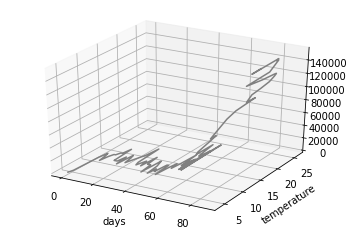

In [0]:
plt.figure()
ax = plt.axes(projection='3d')

x_data = list(range(0, size_data))
y_data = data["Temp"].values
z_data = data["Daily_cases"].values

ax.plot3D(x_data, y_data, z_data, 'gray')
plt.xlabel('days')
plt.ylabel('temperature')
plt.show()

In [0]:
f = sym.sympify(sum_squared_fn)
j = sym.sympify(sym.hessian(f, (a, b, c)))
gradient = sym.zeros(3, 1)

for i, param in enumerate(params):
    gradient[i] = sym.diff(f, param)

**Functions used in the base model**

In [0]:
def gradient_fn(x):
    gradient_value = gradient.evalf(subs={a: x[0], b: x[1], c: x[2]})
    return np.array([gradient_value[0], gradient_value[1], gradient_value[2]]).astype(np.float64)


def hessian_fn(x):
    j_value = j.evalf(subs={a: x[0], b: x[1], c: x[2]})
    return np.array(j_value).astype(np.float64)


# %% [code]
def newton_method(g, h, x, eps):
    gradient_value = g(x)
    error = np.linalg.norm(x, ord=2)  # l2 norm of vector
    iteration_counter = 0

    while abs(error) > eps and iteration_counter < 100:
        print(x)
        print(error)
        j_inv = np.linalg.inv(h(x))
        delta = j_inv.dot(gradient_value)
        x = x - delta
        gradient_value = g(x)
        error = np.linalg.norm(x, ord=2)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(error) > eps:
        iteration_counter = -1
    return x, iteration_counter
    
def expo(point1, point2):
    expo_fn = f'{results[0]}*({results[1]}**{point1})*({results[2]}**{point2})'
    return sym.sympify(expo_fn).evalf()

In [0]:
results, n = newton_method(gradient_fn, hessian_fn, x=np.array([5, 5, 5]), eps=0.01)
print(results)
print(n)

[5 5 5]
8.660254037844387
[4.97652883 4.97659133 4.97650244]
8.619621622078139
[4.95316786 4.95329284 4.95311509]
8.579180084420756
[4.92991659 4.93010402 4.92983744]
8.538928529162124
[4.90677449 4.90702437 4.90666897]
8.49886606479747
[4.88374106 4.88405335 4.88360916]
8.458991804007676
[4.86081579 4.86119048 4.86065751]
8.419304863639493
[4.83799816 4.83843523 4.83781351]
8.379804364685976
[4.81528767 4.81578711 4.81507665]
8.340489432266994
[4.79268382 4.79324561 4.79244643]
8.301359195609855
[4.77018612 4.77081024 4.76992234]
8.262412788029918
[4.74779405 4.7484805  4.7475039 ]
8.223649346911406
[4.72550712 4.72625588 4.72519059]
8.185068013688257
[4.70332485 4.70413591 4.70298194]
8.14666793382507
[4.68124674 4.68212008 4.68087744]
8.108448256798129
[4.6592723  4.66020792 4.65887661]
8.070408136076537
[4.63740104 4.63839893 4.63697896]
8.032546729103437
[4.61563249 4.61669263 4.61518401]
7.994863197277305
[4.59396615 4.59508854 4.59349127]
7.957356705933317
[4.57240155 4.57358619

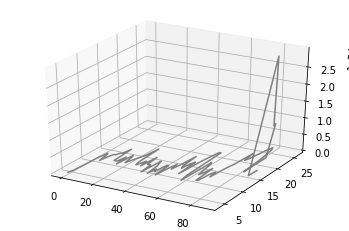

In [0]:
xs = list(range(0, size_data))
ys = data["Temp"].values
zs = []
for i in range(0, size_data):
    zs.append(expo(xs[i], ys[i]))

plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, 'gray')
plt.show()


# **Neural Network**

---



In [0]:
df_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/dataset.csv')
number_of_features = 3

**Helper functions**

In [0]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

**Preprocessing the data**

In [0]:
from sklearn import preprocessing 
temp_data = np.array(df_data.values.tolist())
denormalized_data = temp_data[:, 0:number_of_features]
temp_denormalized_data = denormalized_data
denormalized_labels = temp_data[:, number_of_features].reshape(temp_data.shape[0], 1)
features_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
labels_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

data = features_scaler.fit_transform(denormalized_data)
labels = labels_scaler.fit_transform(denormalized_labels)

**Splitting the data**

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
x_train_denormalized, x_test_denormalized, y_train_denormalized, y_test_denormalized = train_test_split(temp_denormalized_data, denormalized_labels, test_size=0.3, random_state=42)

**Building the NN model**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping

denselayer_model = Sequential()
denselayer_model.add(Dense(256, activation='relu' , input_shape=(number_of_features,1)))
denselayer_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
denselayer_model.add(Flatten())
denselayer_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

denselayer_model.compile(optimizer='rmsprop',loss='mean_absolute_error',metrics=['accuracy', 'mean_absolute_error'])
denselayer_model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3, 256)            512       
_________________________________________________________________
dense_2 (Dense)              (None, 3, 512)            131584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1537      
Total params: 133,633
Trainable params: 133,633
Non-trainable params: 0
_________________________________________________________________


**Training the model**

In [0]:
number_of_iter = 500
x_train_reshaped = x_train.reshape(x_train.shape[0], number_of_features, 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], number_of_features, 1)
history = denselayer_model.fit(x=x_train_reshaped, y=y_train , callbacks=[EarlyStopping(patience = 15, restore_best_weights = True)] , epochs=number_of_iter)

Epoch 1/500
248/248 [==============================] - 0s 628us/step - loss: 0.1258 - accuracy: 0.0202 - mean_absolute_error: 0.1258
Epoch 2/500
248/248 [==============================] - 0s 173us/step - loss: 0.0686 - accuracy: 0.0202 - mean_absolute_error: 0.0686
Epoch 3/500
248/248 [==============================] - 0s 168us/step - loss: 0.0699 - accuracy: 0.0202 - mean_absolute_error: 0.0699
Epoch 4/500
248/248 [==============================] - 0s 204us/step - loss: 0.0682 - accuracy: 0.0202 - mean_absolute_error: 0.0682
Epoch 5/500
248/248 [==============================] - 0s 166us/step - loss: 0.0642 - accuracy: 0.0202 - mean_absolute_error: 0.0642
Epoch 6/500
 32/248 [==>...........................] - ETA: 0s - loss: 0.0702 - accuracy: 0.0312 - mean_absolute_error: 0.0702

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,mean_absolute_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


248/248 [==============================] - 0s 176us/step - loss: 0.0671 - accuracy: 0.0202 - mean_absolute_error: 0.0671
Epoch 7/500
248/248 [==============================] - 0s 160us/step - loss: 0.0594 - accuracy: 0.0202 - mean_absolute_error: 0.0594
Epoch 8/500
248/248 [==============================] - 0s 165us/step - loss: 0.0571 - accuracy: 0.0202 - mean_absolute_error: 0.0571
Epoch 9/500
248/248 [==============================] - 0s 171us/step - loss: 0.0567 - accuracy: 0.0202 - mean_absolute_error: 0.0567
Epoch 10/500
248/248 [==============================] - 0s 158us/step - loss: 0.0537 - accuracy: 0.0202 - mean_absolute_error: 0.0537
Epoch 11/500
248/248 [==============================] - 0s 163us/step - loss: 0.0541 - accuracy: 0.0202 - mean_absolute_error: 0.0541
Epoch 12/500
248/248 [==============================] - 0s 156us/step - loss: 0.0472 - accuracy: 0.0202 - mean_absolute_error: 0.0472
Epoch 13/500
248/248 [==============================] - 0s 155us/step - loss: 

**Testing the model**

In [0]:
from sklearn.metrics import mean_squared_error
y_pred_normalized = denselayer_model.predict(x_test_reshaped)
y_pred_denormalized = labels_scaler.inverse_transform(y_pred_normalized)
mean_abs_error = mean_squared_error(y_test, y_pred_normalized)

**Printing predicted data**

In [0]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["NumberOfDays", "Temperature (C)", "Humidity", "y_pred"]

for i in range(len(y_pred_denormalized)):
  table.add_row([int(x_test_denormalized[i][1]), int(x_test_denormalized[i][1]), truncate(x_test_denormalized[i][2], 4), int(y_pred_denormalized[i])])

In [0]:
print("Mean absolute error: ", mean_abs_error)
print(table)

Mean absolute error:  0.020221541551580714
+--------------+-----------------+----------+--------+
| NumberOfDays | Temperature (C) | Humidity | y_pred |
+--------------+-----------------+----------+--------+
|      15      |        15       |  0.6671  |  2125  |
|      11      |        11       |  0.6842  |  2387  |
|      17      |        17       |  0.5914  | 99570  |
|      14      |        14       |  0.6842  |  -394  |
|      11      |        11       |  0.6771  |  5811  |
|      10      |        10       |  0.7400  | 57861  |
|      13      |        13       |  0.8257  |  6196  |
|      25      |        25       |  0.6771  | 20813  |
|      16      |        16       |  0.6842  |  3502  |
|      13      |        13       |  0.7771  |  318   |
|      16      |        16       |  0.6957  | 110953 |
|      23      |        23       |  0.4357  | 128292 |
|      23      |        23       |  0.7400  | 129746 |
|      9       |        9        |  0.7657  |  2100  |
|      15      |      

**Visualizing the loss**

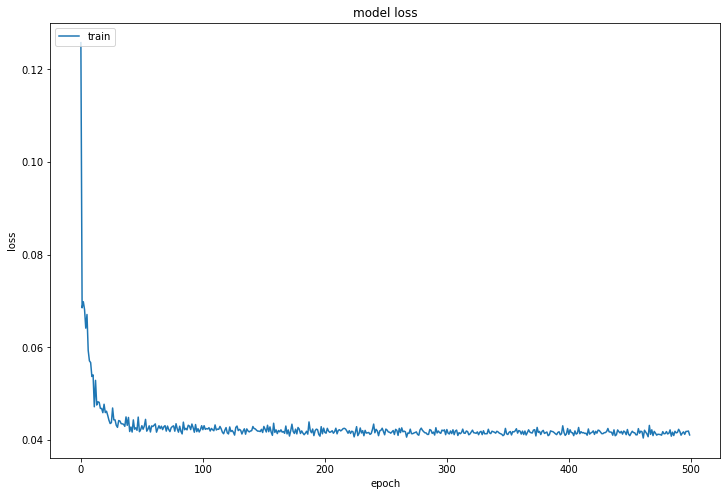

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# summarize history for loss
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()